In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AMZN"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-05-02,101.470001,103.900002,101.150002,103.629997,103.629997,73469400
2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900
2023-05-04,104.040001,105.389999,103.309998,104.000000,104.000000,45345500


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2015-01-02 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2101 non-null   float64
 1   High       2101 non-null   float64
 2   Low        2101 non-null   float64
 3   Close      2101 non-null   float64
 4   Adj Close  2101 non-null   float64
 5   Volume     2101 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.9 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,101.470001,103.900002,101.150002,103.629997,103.629997,73469400
2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900
2023-05-04,104.040001,105.389999,103.309998,104.000000,104.000000,45345500
2023-05-05,104.269997,105.760002,103.550003,105.660004,105.660004,56912900
2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49397600


In [7]:
data.shape

(2101, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03
mean,88.765458,89.797016,87.622209,88.725013,88.725013,8.204274e+07
std,49.027922,49.644996,48.339991,48.971929,48.971929,4.120646e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.762600e+07
25%,41.829498,42.118500,41.562500,41.837002,41.837002,5.561800e+07
50%,88.345497,89.293999,87.290001,88.256500,88.256500,7.057000e+07
75%,123.000000,124.432503,121.349998,123.552002,123.552002,9.555200e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

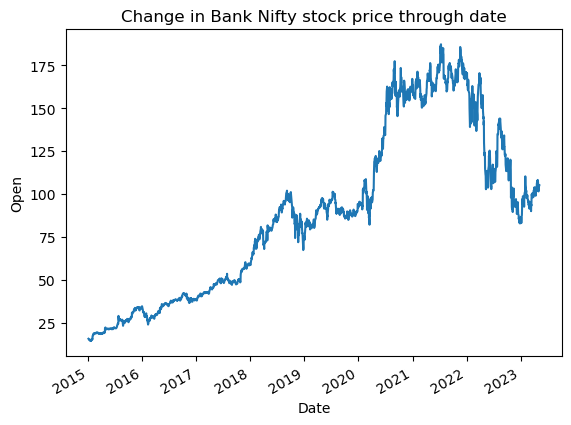

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1575, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1575,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 92.73472992 101.01401024 176.14573212  89.25321457  45.3532349
 106.30104996  87.81741959  34.03013016 164.08475433 106.98177986
  88.17605377  30.02397526 169.20083328 174.27092026 148.5634938
 115.01074921  84.53793945  21.21278044 140.05209671  88.40754387
  93.95774086 112.0241954   97.50294991  98.08750053 157.04157242
  60.13628452 116.33719093  49.60698036  28.8874295   79.24304543
  14.87104014  88.87762596 152.14897339  25.13531507  27.53140499
  59.01345467 150.28035736  38.44165497 161.94963593  93.31072906
  81.33938995  95.80273483  99.39188942  48.27462978 165.323172
 129.27239944  96.64726746 155.527285    92.84948402 156.97176498
 169.70139114  92.22607521  24.19321512  70.79837402  27.72391991
  83.77121063  33.5303138   48.54374947 174.31351715  76.44233055
 161.05541397  27.76627487  86.42150589  95.94870529  39.95765018
 158.98428894  85.37265533  87.49157005 151.72090256  94.5515081
 159.64998398  83.6353405   70.74455536 164.70636948  95.51751892
 176.17181122  

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9995637954259999


In [22]:
y_test=list(y_test)

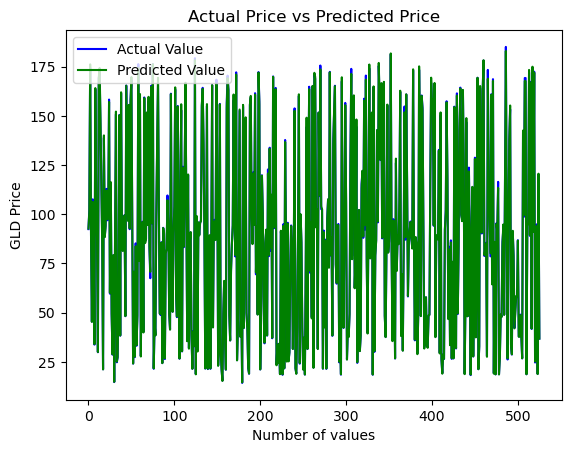

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

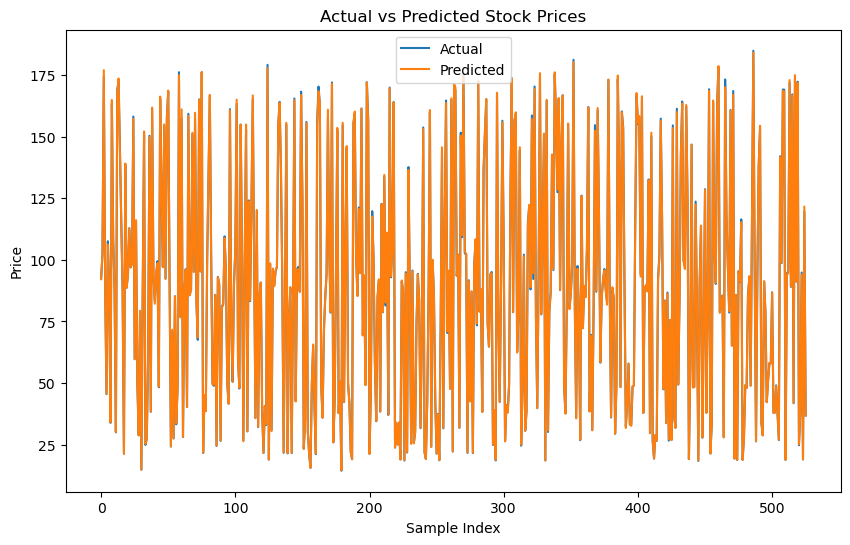

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 15.54986575,  15.21591447,  14.8031754 , ..., 104.59065999,
       104.94745925, 105.65663619])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value5456
enter a value34
enter a value232
-3370.679331116636


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AMZN_model.pkl",'wb')
pickle.dump(model,file)